In [1]:
import sys
#sys.path.append('C:/Users/Fabian/Documents/gempy')
sys.path.insert(0, '/home/bl9/gempy')
import gempy as gp

%matplotlib inline
import pymc
import numpy as np
import math

from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import vtk
import evtk

from scipy.interpolate import griddata

import decision_making as dm

from skimage import measure
from scipy.spatial import distance

import scipy.signal as sg

import spill_analysis as sp

Devito is not working


/home/bl9/gempy/gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')


Freenect is not installed. Sandbox wont work. Good luck


In [2]:
# Importing the data from csv files and setting extent and resolution
geo_data = gp.create_data([0,1000,0,1000,0,1000],[50,50,50],
                         path_o = ".././input_data/simple_dome_orientations1.csv",
                         path_i = ".././input_data/simple_dome_points1.csv")
geo_data.n_faults = 0

In [3]:
gp.set_series(geo_data, {"Dome":('Shale')},
                       order_series = ["Dome",], order_formations=['Shale',])

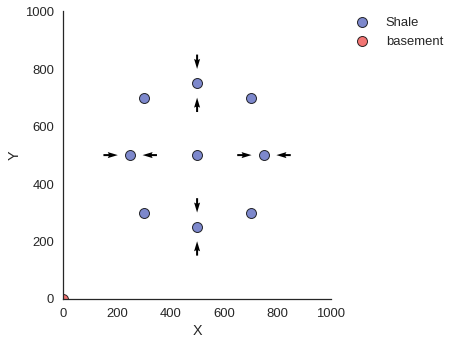

In [4]:
figsize(20,10)
gp.plotting.plot_data(geo_data,direction='z')

In [5]:
# Groups considering top view on spill line:
# From A to H clockwise, starting at center left
# Central points are a separate group (nan)

geo_data.interfaces['group_id']

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    NaN
9    NaN
Name: group_id, dtype: float64

In [6]:
interp_data = gp.InterpolatorData(geo_data,u_grade=[3],
                                  output='gradients', dtype='float64', compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0


In [7]:
lith_sol, fault_sol = gp.compute_model(interp_data)

In [8]:
geo_data.formations

value  formation_number
Shale         1                 1
basement      2                 2

In [8]:
base_n = geo_data.formations.loc['basement','formation_number']
#sandstone_n = int(geo_data.formations.loc['Sandstone','formation_number'].values[0])
shale_n = geo_data.formations.loc['Shale','formation_number']

In [9]:
#sst_surf_v, sst_surf_s = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[1], n_formation = sandstone_n)
shale_surf_v, shale_surf_s = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[1], n_formation = shale_n)

In [10]:
# DECLARING SOME MODEL VARIABLES
resolution = geo_data.resolution[1] #resolution, standard: 50
model_size = geo_data.extent[:2][1] # 'real' model extent, here: 2000 m - cubic (what if not cubic?)
scale_factor = (model_size/resolution) # scale factor used for calculating voxel volumes in [m]
                                        # here: 2000/50 = 40
rescale_f = interp_data.rescaling_factor # rescaling factor from geo_data to interp_data

minmax_buffer = True # buffer around local min and max values [on/off] - not used atm

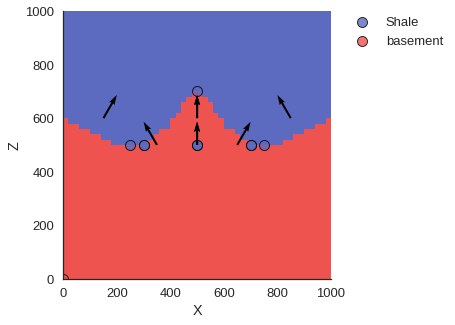

In [34]:
%matplotlib inline
figsize(20,10)
gp.plotting.plot_section(geo_data, lith_sol[0], int(resolution/2), plot_data=1, direction='y')

In [12]:
GX,GY,GZ=lith_sol[2].reshape(50,50,50), lith_sol[3].reshape(50,50,50), lith_sol[4].reshape(50,50,50)

In [15]:
#sp.get_surface_extrema(geo_data, shale_surf_v, GX,GY,plot_figure=True)

In [19]:
sp.get_saddle_point(geo_data, shale_surf_v, GX,GY)

array([ 540.        ,  260.        ,  491.76986694])

In [ ]:
%%timeit
sp.get_gradient_minima(geo_data, GX,GY)

In [25]:
grad_minima=sp.get_gradient_minima(geo_data, GX,GY)

In [37]:
%%timeit
sp.get_gradmin_intersect(geo_data, shale_surf_v, grad_minima)

283 ms ± 8.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


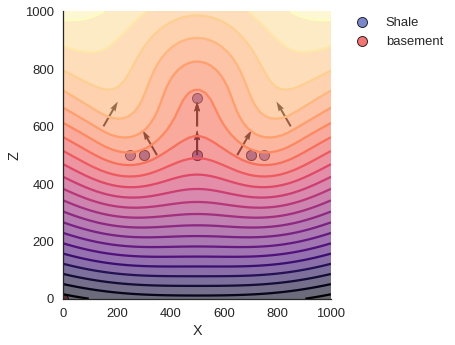

In [35]:
%matplotlib inline
figsize(20,10)
gp.plotting.plot_scalar_field(geo_data, lith_sol[1], 
                              25,
                              plot_data=1, direction='y')

In [36]:
importlib.reload(np)
a = np.zeros_like(lith_sol[3])

/home/bl9/gempy/gempy/plotting/visualization.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self._data.resolution[0], self._data.resolution[1], self._data.resolution[2])[_a, _b, _c].T,
/home/bl9/gempy/gempy/plotting/visualization.py:324: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self._data.resolution[0], self._data.resolution[1], self._data.resolution[2])[_a, _b, _c].T,
/home/bl9/gempy/gempy/plotting/visualization.py:424: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  U = gx.reshape(self._data.resolution[0], self._data.resolution[1], self._data.resolution[2])[::quiver_stepsize, ::quiver_stepsize, cell_number].T
/home/bl9/gempy/gempy/plotting/visualization.py:425: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the f

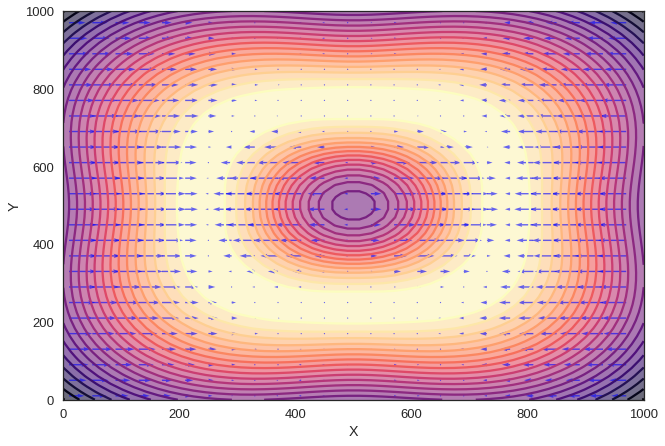

In [40]:
gp.plot_gradient(geo_data, lith_sol[1], lith_sol[2], a, lith_sol[4], 
                 cell_number=resolution/2, direction='z', quiver_stepsize=2)

/home/bl9/gempy/gempy/plotting/visualization.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self._data.resolution[0], self._data.resolution[1], self._data.resolution[2])[_a, _b, _c].T,
/home/bl9/gempy/gempy/plotting/visualization.py:324: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self._data.resolution[0], self._data.resolution[1], self._data.resolution[2])[_a, _b, _c].T,
/home/bl9/gempy/gempy/plotting/visualization.py:424: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  U = gx.reshape(self._data.resolution[0], self._data.resolution[1], self._data.resolution[2])[::quiver_stepsize, ::quiver_stepsize, cell_number].T
/home/bl9/gempy/gempy/plotting/visualization.py:425: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the f

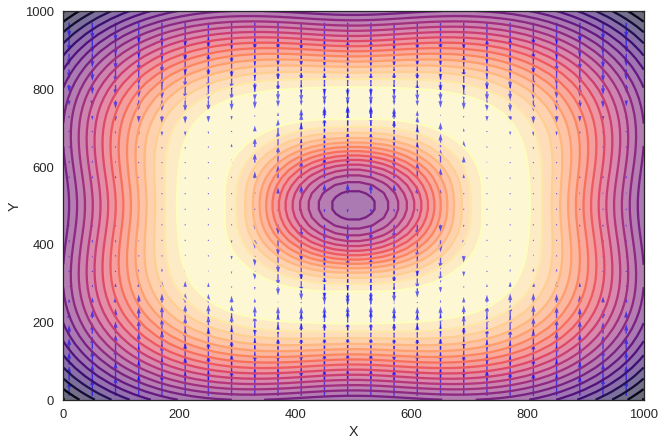

In [41]:
gp.plot_gradient(geo_data, lith_sol[1], a, lith_sol[3], lith_sol[4], 
                 cell_number=resolution/2, direction='z', quiver_stepsize=2)

# Getting minima in GX and GY

In [50]:
# reshaping and naming the three gradient solutions accordingly
gx = lith_sol[2].reshape(resolution,resolution,resolution)
gy = lith_sol[3].reshape(resolution,resolution,resolution)
gz = lith_sol[4].reshape(resolution,resolution,resolution)

In [51]:

# using marching cubes to aquire surfaces (vertices, simplices) that align
# with the occurrence of zeros of the gradients (gradient minima)
v_gx0, s_gx, n_gx, val_gx = measure.marching_cubes_lewiner(gx, 0)
v_gy0, s_gy, n_gy, val_gy = measure.marching_cubes_lewiner(gy, 0)

In [52]:
v_gx0.shape, v_gy0.shape # note: v_gy0 longer than v_gx0 after marching cube application

((11014, 3), (11020, 3))

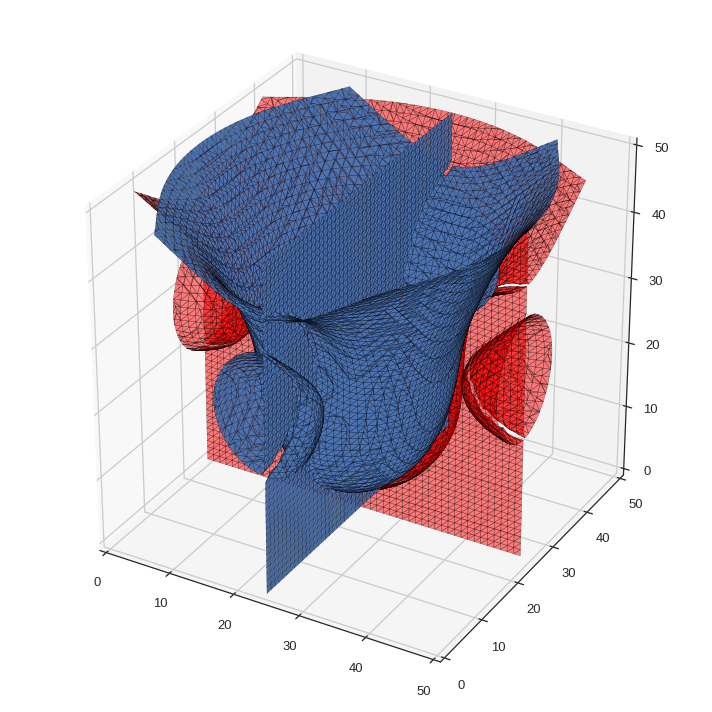

In [53]:
# 3D visualization of both surfaces attained via marching cubes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(v_gx0[s_gx], alpha=0.5)
mesh.set_edgecolor('k')

mesh2 = Poly3DCollection(v_gy0[s_gy], alpha=0.5)
mesh2.set_edgecolor('k')
mesh2.set_facecolor('r')
ax.add_collection3d(mesh2)
ax.add_collection3d(mesh)

ax.set_xlim(0, resolution)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, resolution)  # b = 10
ax.set_zlim(0, resolution)  # c = 16

plt.tight_layout()
plt.show()

In [54]:
# scaling from voxels up to meters using the original extent
vox_size_x = geo_data.extent[1]/resolution
vox_size_y = geo_data.extent[3]/resolution
vox_size_z = geo_data.extent[5]/resolution
vox_size_diag = np.sqrt(vox_size_x**2 + vox_size_y**2 + vox_size_z**2)

#v_gx = v_gx0 * vox_size_x
#v_gy = v_gy0 * vox_size_y

v_gx = v_gx0
v_gx[:,0] = v_gx0[:,0] * vox_size_x
v_gx[:,1] = v_gx0[:,1] * vox_size_y
v_gx[:,2] = v_gx0[:,2] * vox_size_z

v_gy = v_gy0
v_gy[:,0] = v_gy0[:,0] * vox_size_x
v_gy[:,1] = v_gy0[:,1] * vox_size_y
v_gy[:,2] = v_gy0[:,2] * vox_size_z

In [55]:
# calculating euclidean distance between both surface vertices
dist_gxy = distance.cdist(v_gx,v_gy, 'euclidean')

In [56]:
# get distance minima and minima positions for both vertices groups
# this way we can pair 2 vertices from gx and gy based on their 
# common distance which is to be minimal (smaller than to all other points)
minx = np.min(dist_gxy, axis=1)
miny = np.min(dist_gxy, axis=0)
minx_pos = np.argmin(dist_gxy, axis=1)
miny_pos = np.argmin(dist_gxy, axis=0)

In [28]:
geo_data.extent[1]/resolution

20.0

In [57]:
# set a cut-off value for minimal distance (here: 20 = voxelsize)
gx_cut_bool = minx < vox_size_diag
gy_cut_bool = miny < vox_size_diag

In [51]:
# need to pair the vertices of one group to those of the other
# for this we actually only need the minima positions of one vertices group
#vgy_paired = v_gy[minx_pos]
### pair the mins of the shorter array onto the longer array

In [53]:
# limit (cut down) the vertices groups to only those 
# below the defined distance threshold
#vgx_cut = v_gx[gx_cut_bool]
#vgy_cut = vgy_paired[gx_cut_bool]

In [54]:
# now that we have one group (V1) and their according pairs (V2),
# we can get the mean of the distances to acquire new group of
# vertices that minimizes the error
#V1=vgx_cut
#V2=vgy_cut
#V_mean = (V1+V2)/2

In [58]:
if len(v_gy) >= len(v_gx):
    vgy_paired = v_gy[minx_pos]
    # limit (cut down) the vertices groups to only those
    # below the defined distance threshold
    vgx_cut = v_gx[gx_cut_bool]
    vgy_cut = vgy_paired[gx_cut_bool]

    V1 = vgx_cut
    V2 = vgy_cut
    V_mean = (V1 + V2) / 2
else:
    vgx_paired = v_gx[miny_pos]
    vgy_cut = v_gy[gy_cut_bool]
    vgx_cut = vgx_paired[gy_cut_bool]

    V1 = vgx_cut
    V2 = vgy_cut
    V_mean = (V1 + V2) / 2

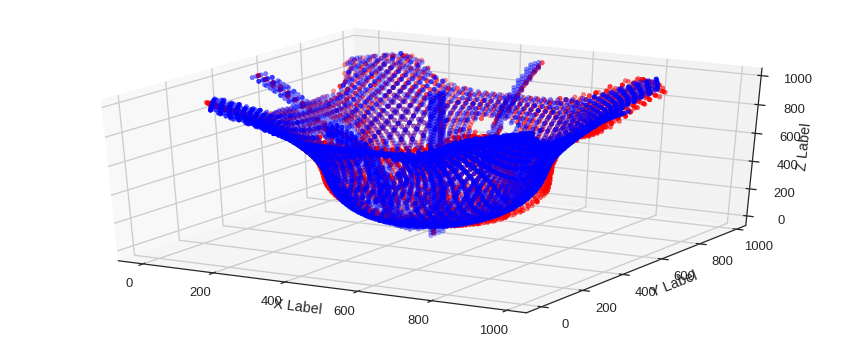

In [59]:
# plotting of the two original groups, but limited
%matplotlib inline
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(v_gx0[:,0],v_gx0[:,1],v_gx0[:,2], color='b')
ax.scatter(vgx_cut[:,0],vgx_cut[:,1],vgx_cut[:,2], color='b')
ax.scatter(vgy_cut[:,0],vgy_cut[:,1],vgy_cut[:,2], color='r')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

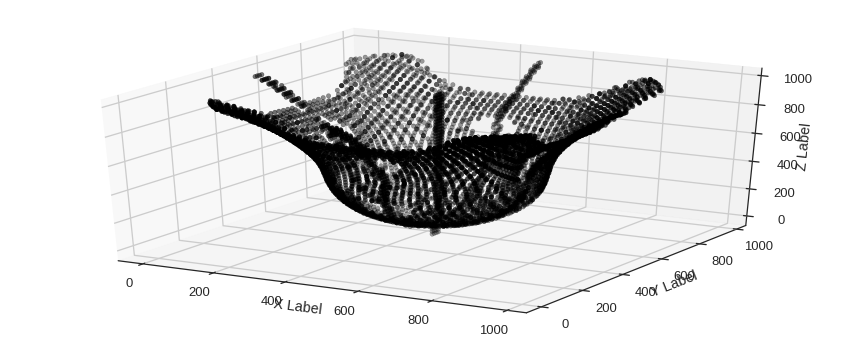

In [60]:
# plotting of the final mean group of vertices, limited according to the threshold
%matplotlib inline
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(V_mean[:,0],V_mean[:,1],V_mean[:,2], color='k')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Finding intersection of the layer surface of interest and the gradient minima

In [61]:
# get layer surface vertices
v_layer,s_layer = gp.get_surfaces(interp_data, lith_sol[1])
v_l = np.array(v_layer[0])

In [78]:
# get distance between gradient minima vertices and layer surface vertices
lmin_dist = distance.cdist(v_gx, v_l)

In [79]:
# find intersect between gradient minima and surface (same procedure as above)
min_dist = np.min(lmin_dist, axis=0)
l_cut_bool = min_dist < vox_size_diag
intersect = v_l[l_cut_bool]

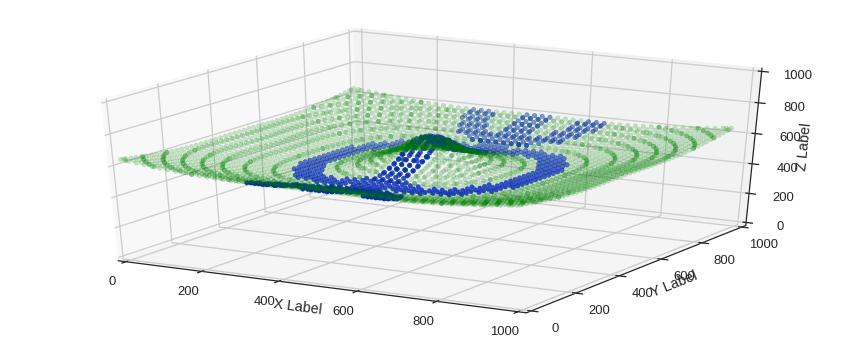

In [80]:
# 3D plotting of intersection
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(V_mean[:,0],V_mean[:,1],V_mean[:,2], color='k', alpha=0.1)
ax.scatter(v_l[:,0],v_l[:,1],v_l[:,2], color='g', alpha=0.2)
ax.scatter(intersect[:,0],intersect[:,1],intersect[:,2], color='b')
#ax.scatter(intersect_y[:,0],intersect_y[:,1],intersect_y[:,2], color='r')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_zlim(0,1000)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Differentiate between minima, maxima and saddle points via changes of gradient signs in voxels

In [65]:
#getting array with gradient signs (-1 for negative, 1 for positive and exactly 0)
gx_signs = np.sign(gx)
gy_signs = np.sign(gy)

# empty holder arrays for inserting minima and maxima
gx_maxima = np.zeros_like(gx)
gy_maxima = np.zeros_like(gy)
gx_minima = np.zeros_like(gx)
gy_minima = np.zeros_like(gy)

In [66]:
# create boolean arrays where signchange voxels are True
signchange_gx = ((np.roll(gx_signs, 1, axis=0) - gx_signs) != 0).astype(int)
# avoid border error from np.roll by setting relevant border to False
signchange_gx[0,:,:]=0

signchange_gy = ((np.roll(gy_signs, 1, axis=1) - gy_signs) != 0).astype(int)
signchange_gy[:,0]=0

In [67]:
# conditions for a voxel to be recognized as maximum or minimum in given direction
gx_max_cond = (signchange_gx==1) & (gx_signs == 1)
gy_max_cond = (signchange_gy==1) & (gy_signs == 1)

gx_min_cond = (signchange_gx==1) & (gx_signs == -1)
gy_min_cond = (signchange_gy==1) & (gy_signs == -1)

# change to a positive sign indicates a minimum?

In [68]:
# voxels which meet the conditions are marked as True
# for maxima and minima accordingly
# since signchange only identifies the next index AFTER the signchange,
# we include the voxel BEFORE the signchange by doing an according roll
gx_maxima[gx_max_cond] = 1
gx_maxima2 = np.roll(gx_maxima, -1, axis=1)
gx_max_final = gx_maxima + gx_maxima2

gy_maxima[gy_max_cond] = 1
gy_maxima2 = np.roll(gy_maxima, -1, axis=0)
gy_max_final = gy_maxima + gy_maxima2

# overall maxima in BOTH directions:
vox_maxima = np.logical_and(gx_max_final, gy_max_final) 

#NOTE: 0 gives a POSITIVE sign! Might have to correct for this?

# analogous process for minima:
gx_minima[gx_min_cond] = 1
gx_minima2 = np.roll(gx_minima, -1, axis=1)
gx_min_final = gx_minima + gx_minima2

gy_minima[gy_min_cond] = 1
gy_minima2 = np.roll(gy_minima, -1, axis=0)
gy_min_final = gy_minima + gy_minima2

vox_minima = np.logical_and(gx_min_final, gy_min_final) 

In [69]:
# saddle points as max in one and min in the other direction
vox_saddles = np.logical_or(np.logical_and(gx_min_final, gy_max_final), 
                np.logical_and(gy_min_final, gx_max_final)) 

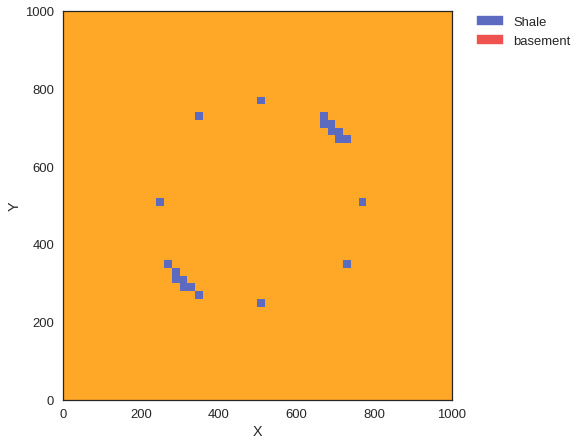

In [70]:
# minima voxel section plotting
gp.plotting.plot_section(geo_data, vox_minima, 25, direction='z')

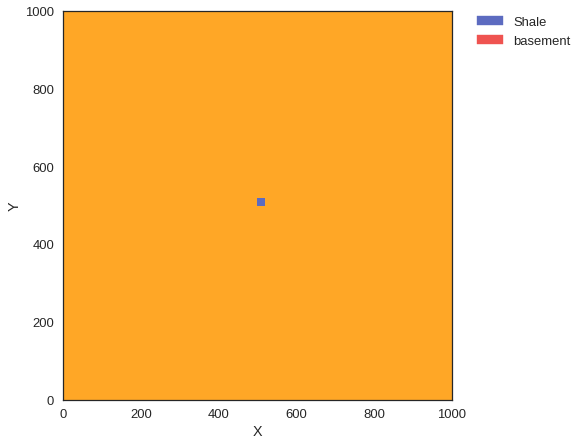

In [71]:
# maxima voxel section plotting
gp.plotting.plot_section(geo_data, vox_maxima, 25, direction='z')

In [72]:
geo_data.grid.values

array([[  10.,   10.,   10.],
       [  10.,   10.,   30.],
       [  10.,   10.,   50.],
       ..., 
       [ 990.,  990.,  950.],
       [ 990.,  990.,  970.],
       [ 990.,  990.,  990.]], dtype=float32)

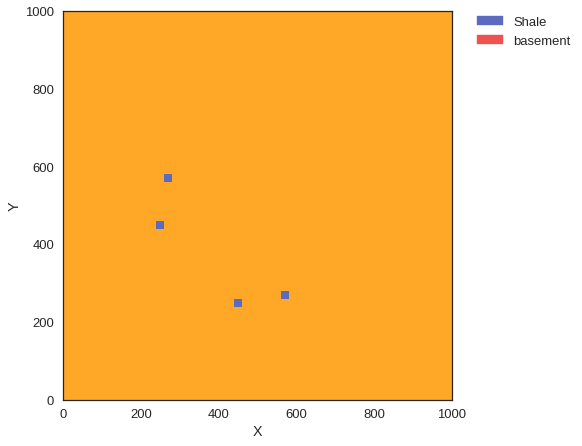

In [73]:
# saddle points voxel section plotting
gp.plotting.plot_section(geo_data, vox_saddles, 25, direction='z')

# Match intersection points with minima, maxima and saddle point voxels

In [74]:
#%%timeit RESULT: 7.01 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# --> FASTER!
# approach via direct voxel coordinates

# get the coordinates for minima, maxima and saddles
MAX_coord0 = np.argwhere(vox_maxima==True)
MIN_coord0 = np.argwhere(vox_minima==True)
SADD_coord0 = np.argwhere(vox_saddles==True)

# rescale the coordinates to actual size of voxels
# to use combined with the intersection coordinates from above
MAX_coord = MAX_coord0
MAX_coord[:,0] = (MAX_coord0[:,0] * vox_size_x) #+ vox_size_x/2
MAX_coord[:,1] = (MAX_coord0[:,1] * vox_size_y) #+ vox_size_y/2
MAX_coord[:,2] = (MAX_coord0[:,2] * vox_size_z) #+ vox_size_z/2

MIN_coord = MIN_coord0
MIN_coord[:,0] = (MIN_coord0[:,0] * vox_size_x) #+ vox_size_x/2
MIN_coord[:,1] = (MIN_coord0[:,1] * vox_size_y) #+ vox_size_y/2
MIN_coord[:,2] = (MIN_coord0[:,2] * vox_size_z) #+ vox_size_z/2

SADD_coord = SADD_coord0
SADD_coord[:,0] = (SADD_coord0[:,0] * vox_size_x) #+ vox_size_x/2
SADD_coord[:,1] = (SADD_coord0[:,1] * vox_size_y) #+ vox_size_y/2
SADD_coord[:,2] = (SADD_coord0[:,2] * vox_size_z) #+ vox_size_z/2

# get distances between intersection and the according extrema coordinates
dist_MIN = distance.cdist(intersect,MIN_coord, 'euclidean')
dist_MAX = distance.cdist(intersect,MAX_coord, 'euclidean')
dist_SADD = distance.cdist(intersect,SADD_coord, 'euclidean')

# classify intersection extrema by limiting to distance to according voxel coordinates
# half a voxel-diagonal to get what is "inside" a voxel (best results, yet)
min_dist_MIN = np.min(dist_MIN, axis=1)
cut_bool_MIN = min_dist_MIN < vox_size_diag/2
intersect_minima_all = intersect[cut_bool_MIN]

min_dist_MAX = np.min(dist_MAX, axis=1)
cut_bool_MAX = min_dist_MAX < vox_size_diag/2
intersect_maxima_all = intersect[cut_bool_MAX]

min_dist_SADD = np.min(dist_SADD, axis=1)
cut_bool_SADD = min_dist_SADD < vox_size_diag/2
intersect_saddles_all = intersect[cut_bool_SADD]

# get highest max and highest saddle point as the relevant points
it_final_MAX = intersect_maxima_all[np.argmax(intersect_maxima_all[:,2])]
it__final_SADD = intersect_saddles_all[np.argmax(intersect_maxima_all[:,2])]

### how are minima relevant?

### given several peaks in a structure, might have to reduce to only one max point per peak via eucl. distance
### but how to deal with several spill points?

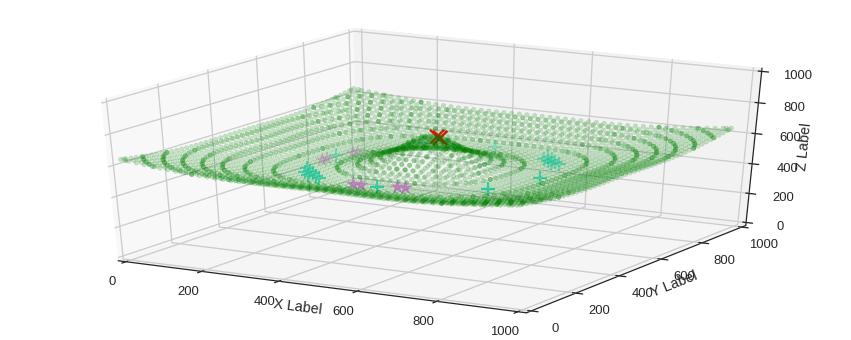

In [75]:
# 3D plotting
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(V_mean[:,0],V_mean[:,1],V_mean[:,2], color='k', alpha=0.1)
ax.scatter(v_l[:,0],v_l[:,1],v_l[:,2], color='g', alpha=0.2)
#ax.scatter(intersect[:,0],intersect[:,1],intersect[:,2], color='b')
ax.scatter(intersect_minima_all[:,0],intersect_minima_all[:,1],intersect_minima_all[:,2], color='turquoise', s=200, marker='+')
ax.scatter(intersect_maxima_all[:,0],intersect_maxima_all[:,1],intersect_maxima_all[:,2], color='r', s=200, marker='x')
ax.scatter(intersect_saddles_all[:,0],intersect_saddles_all[:,1],intersect_saddles_all[:,2], color='violet', s=200, marker='*')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_zlim(0,1000)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [76]:
np.max(intersect_minima_all[:,2]), np.max(intersect_saddles_all[:,2]), np.max(intersect_maxima_all[:,2])

(491.1927032470702, 491.76986694335926, 685.33889770507801)

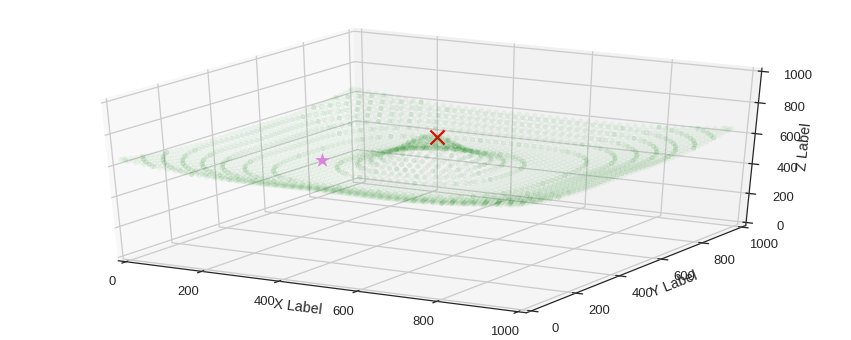

In [77]:
# 3D plotting
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(V_mean[:,0],V_mean[:,1],V_mean[:,2], color='k', alpha=0.1)
ax.scatter(v_l[:,0],v_l[:,1],v_l[:,2], color='g', alpha=0.05)
#ax.scatter(intersect[:,0],intersect[:,1],intersect[:,2], color='b')
#ax.scatter(intersect_minima[:,0],intersect_minima[:,1],intersect_minima[:,2], color='turquoise', s=200, marker='+')
ax.scatter(it_final_MAX[0],it_final_MAX[1],it_final_MAX[2], color='r', s=200, marker='x')
ax.scatter(it__final_SADD[0],it__final_SADD[1],it__final_SADD[2], color='violet', s=200, marker='*')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_zlim(0,1000)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [74]:
#%%timeit RESULT: 32.4 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# --> SLOWER!
# approach via extracting vertices from voxels
# to be DISCARDED!

v_max0, s_max, n_max, val_max = measure.marching_cubes_lewiner(np.invert(vox_maxima), 0)
v_min0, s_min, n_min, val_min = measure.marching_cubes_lewiner(np.invert(vox_minima), 0)
v_saddles0, s_saddles, n_saddles, val_saddles = measure.marching_cubes_lewiner(np.invert(vox_saddles), 0)

v_max = v_max0
v_max[:,0] = v_max0[:,0] * vox_size_x
v_max[:,1] = v_max0[:,1] * vox_size_y
v_max[:,2] = v_max0[:,2] * vox_size_z

v_min = v_min0
v_min[:,0] = v_min0[:,0] * vox_size_x
v_min[:,1] = v_min0[:,1] * vox_size_y
v_min[:,2] = v_min0[:,2] * vox_size_z

v_saddles = v_saddles0
v_saddles[:,0] = v_saddles0[:,0] * vox_size_x
v_saddles[:,1] = v_saddles0[:,1] * vox_size_y
v_saddles[:,2] = v_saddles0[:,2] * vox_size_z

dist_min = distance.cdist(intersect,v_min, 'euclidean')
dist_max = distance.cdist(intersect,v_max, 'euclidean')
dist_saddles = distance.cdist(intersect,v_saddles, 'euclidean')

min_dist_min = np.min(dist_min, axis=1)
cut_bool_min = min_dist_min < vox_size_diag/2
intersect_minima = intersect[cut_bool_min]

min_dist_max = np.min(dist_max, axis=1)
cut_bool_max = min_dist_max < vox_size_diag/2
intersect_maxima = intersect[cut_bool_max]

min_dist_saddles = np.min(dist_saddles, axis=1)
cut_bool_saddles = min_dist_saddles < vox_size_diag/2
intersect_saddles = intersect[cut_bool_saddles]

its_MAX = intersect_maxima[np.argmax(intersect_maxima[:,2])]
its_SADL = intersect_saddles[np.argmax(intersect_maxima[:,2])]

### given several peaks in a structure, might have to reduce to only one max point per peak via eucl. distance
### but how to deal with several spill points?

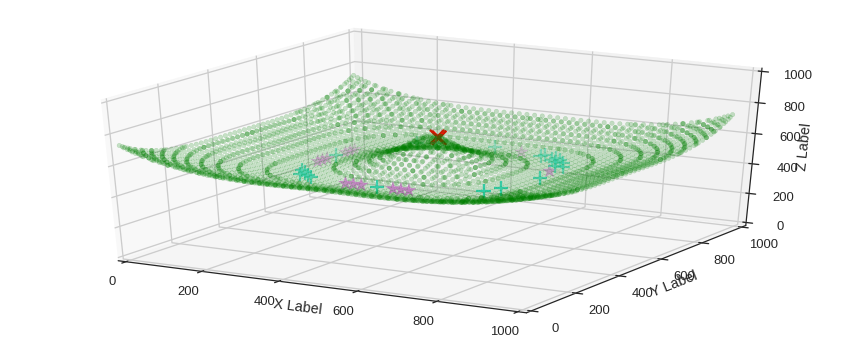

In [75]:
# 3D plotting
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(V_mean[:,0],V_mean[:,1],V_mean[:,2], color='k', alpha=0.1)
ax.scatter(v_l[:,0],v_l[:,1],v_l[:,2], color='g', alpha=0.2)
#ax.scatter(intersect[:,0],intersect[:,1],intersect[:,2], color='b')
ax.scatter(intersect_minima[:,0],intersect_minima[:,1],intersect_minima[:,2], color='turquoise', s=200, marker='+')
ax.scatter(intersect_maxima[:,0],intersect_maxima[:,1],intersect_maxima[:,2], color='r', s=200, marker='x')
ax.scatter(intersect_saddles[:,0],intersect_saddles[:,1],intersect_saddles[:,2], color='violet', s=200, marker='*')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_zlim(0,1000)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [76]:
np.max(intersect_minima[:,2]), np.max(intersect_saddles[:,2]), np.max(intersect_maxima[:,2])

(490.76061248779286, 490.7928848266601, 684.43466186523426)

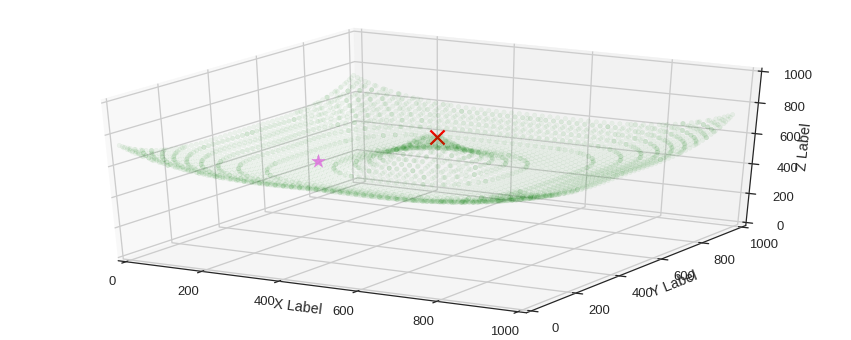

In [77]:
# 3D plotting
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(V_mean[:,0],V_mean[:,1],V_mean[:,2], color='k', alpha=0.1)
ax.scatter(v_l[:,0],v_l[:,1],v_l[:,2], color='g', alpha=0.05)
#ax.scatter(intersect[:,0],intersect[:,1],intersect[:,2], color='b')
#ax.scatter(intersect_minima[:,0],intersect_minima[:,1],intersect_minima[:,2], color='turquoise', s=200, marker='+')
ax.scatter(its_MAX[0],its_MAX[1],its_MAX[2], color='r', s=200, marker='x')
ax.scatter(its_SADL[0],its_SADL[1],its_SADL[2], color='violet', s=200, marker='*')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_zlim(0,1000)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [54]:
def spill_leak_P(interp_data, res_surf, lith, fault_presence = geo_data.n_faults, print_figures=True):    
    
    # creating a grid with uniform distances for vertices of the reservoir surface
    grid_x, grid_y = np.meshgrid(np.unique(interp_data.geo_data_res.grid.values[:, 0]),
                             np.unique(interp_data.geo_data_res.grid.values[:, 1]))

    #grid_x=(grid_x*rescale_f)-(np.min(grid_x)*rescale_f)
    #grid_y=(grid_y*rescale_f)-(np.min(grid_y)*rescale_f)
    grid_x=(grid_x)-(np.min(grid_x))
    grid_y=(grid_y)-(np.min(grid_y))
    
    grid_z0 = griddata(res_surf[:,:2], res_surf[:,2],
                       (grid_x, grid_y), method='linear')
    
    # order of values that serve to find relative extrema (min/max)
    rel_order_maxX = 5
    rel_order_maxY = 10
    rel_order_minX = 5
    rel_order_minY = 5
    
    # check grid_z0 for max and min in directions x and y
    # direction X
    minX1,minX2 = argrelextrema(grid_z0,np.less,order=rel_order_minX,axis=1)
    maxX1,maxX2 = argrelextrema(grid_z0,np.greater,order=rel_order_maxX,axis=1)
    grid_minX = np.zeros_like(grid_z0)
    grid_minX[minX1,minX2]=1           # grid of min in X
    grid_maxX = np.zeros_like(grid_z0)
    grid_maxX[maxX1,maxX2]=1           # grid of max in X
    
    #direction Y
    minY1,minY2 = argrelextrema(grid_z0,np.less,order=rel_order_minY,axis=0)
    maxY1,maxY2 = argrelextrema(grid_z0,np.greater,order=rel_order_maxY,axis=0)
    grid_minY = np.zeros_like(grid_z0)
    grid_minY[minY1,minY2]=1           # grid of min in Y
    grid_maxY = np.zeros_like(grid_z0)
    grid_maxY[maxY1,maxY2]=1           # grid of max in Y
    
    # fault leak line: defining line of juxtaposition, point of cross-fault leakage to be found on it
    # check for minima line that is on hanging wall side compared to max contact of layer top with fault
    fault_max_line_bool = np.copy(grid_maxX)
    fault_max_line = fault_max_line_bool.argmax(axis=1)
    fault_max = np.max(fault_max_line) # max of fault-layer contact as threshold        
    fleak_line = np.copy(grid_minX).astype(int)
    fleak_line[:,fault_max:]=0 # only returns minima at hanging wall side
    
    # minmax buffering
    # to set neighboring values of min and max to min and max respectively, too 
    if minmax_buffer:
        minXroll1 = np.logical_or(grid_minX,np.roll(grid_minX,1, axis=0))
        minXroll1[:,:fault_max] = 0
        minXroll2 = np.logical_or(grid_minX,np.roll(grid_minX,-1, axis=0))
        minXroll2[:,:fault_max] = 0
        minXbuffer = np.logical_or(minXroll1, minXroll2)
        grid_minX = np.logical_or(grid_minX, minXbuffer)
        #grid_maxX = np.logical_or(grid_maxX,np.roll(grid_maxX,1))
        #grid_maxX = np.logical_or(grid_maxX,np.roll(grid_maxX,-1))
        #grid_minY = np.logical_or(grid_minY,np.roll(grid_minY,1))
        #grid_minY = np.logical_or(grid_minY,np.roll(grid_minY,-1))
        grid_maxY = np.logical_or(grid_maxY,np.roll(grid_maxY,1, axis=1))
        grid_maxY = np.logical_or(grid_maxY,np.roll(grid_maxY,-1, axis=1))
    
    #check for saddle points
    saddle_p1 = np.logical_and(grid_minX,grid_maxY)
    saddle_p2 = np.logical_and(grid_minY,grid_maxX)
    saddle_p_all= np.logical_or(saddle_p1, saddle_p2)
    
    # this should find saddle points relative to X and Y directions
    # problem of finding other points in a rotated direction?
    ### NOT FINISHED: DEFINE LEAK POINT OVER LEAK LINE MAX?
    
    if fault_presence == 0:
        pot_spill_points = saddle_p_all
        
        pot_spill_Xcoord = grid_x[pot_spill_points]
        pot_spill_Ycoord = grid_y[pot_spill_points]
        pot_spill_Zcoord = grid_z0[pot_spill_points]    
        pot_spill_3Dcoord = np.array(list(zip(pot_spill_Xcoord, pot_spill_Ycoord, pot_spill_Zcoord)))
        
        if pot_spill_3Dcoord.size == 0:
            anticline_spill_3Dcoord = np.array([]) # if no leak coordinates found, set to empty array
        else:
            max_spill_pos = pot_spill_3Dcoord[:,2].argmax(axis=0)
            anticline_spill_3Dcoord = pot_spill_3Dcoord[max_spill_pos,:]
            
        if print_figures==True:
            figsize(15,6)
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            #ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
            ax.scatter(grid_x, grid_y, grid_minY, c="b", alpha = 0.1)
            ax.scatter(grid_x, grid_y, grid_maxY, c="r", alpha = 0.1)
            ax.scatter(grid_x, grid_y, grid_minX, c="b", alpha = 0.1)
            ax.scatter(grid_x, grid_y, grid_maxX, c="r", alpha = 0.1)
            ax.scatter(grid_x, grid_y, pot_spill_points, c="black", alpha = 1, marker='x', s = 250)
            #ax.scatter(grid_x, grid_y, pot_leak_points, c="black", alpha = 1, marker='+', s = 250)
            ax.scatter(grid_x, grid_y, fleak_line, c="b", alpha = 1, marker='+', s= 250)
            #ax.scatter(grid_x, grid_y, leak_max[2], c="g", alpha = 1, marker='+', s= 250)
            
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            
            plt.show()
        
            # plot of reservoir top surface and position of all potential LPs(+) and SPs(x):
            fault_leak_3Dcoord = np.nan
            plot_spill_leak(res_surf, pot_spill_points, anticline_spill_3Dcoord, 
                            fault_leak_3Dcoord, grid_x, grid_y, grid_z0)
        
        return anticline_spill_3Dcoord, np.nan
    
    else:          
    
        # distinguish anticlinal spill points from fault leak points:
        pot_leak_points = np.logical_and(fleak_line,saddle_p_all)    
        pot_spill_points = saddle_p_all - pot_leak_points   # substracting leak bool from saddle point bool 
                                                            # to get spill point bool    
        # leak and spill point 3D coordinates
        # LEAK POINT
        pot_leak_Xcoord = grid_x[pot_leak_points]
        pot_leak_Ycoord = grid_y[pot_leak_points]
        pot_leak_Zcoord = grid_z0[pot_leak_points]    
        pot_leak_3Dcoord = np.array(list(zip(pot_leak_Xcoord, pot_leak_Ycoord, pot_leak_Zcoord)))
            
        if pot_leak_3Dcoord.size == 0:
            fault_leak_3Dcoord = np.array([]) # if no leak coordinates found, set to empty array
        else:
            max_leak_pos = pot_leak_3Dcoord[:,2].argmax(axis=0)
            fault_leak_3Dcoord = pot_leak_3Dcoord[max_leak_pos,:] # max is LP
            
        # SPILL POINT
        pot_spill_Xcoord = grid_x[pot_spill_points]
        pot_spill_Ycoord = grid_y[pot_spill_points]
        pot_spill_Zcoord = grid_z0[pot_spill_points]    
        pot_spill_3Dcoord = np.array(list(zip(pot_spill_Xcoord, pot_spill_Ycoord, pot_spill_Zcoord)))
        
        if pot_spill_3Dcoord.size == 0:
            anticline_spill_3Dcoord = np.array([]) # if no leak coordinates found, set to empty array
        else:
            max_spill_pos = pot_spill_3Dcoord[:,2].argmax(axis=0)
            anticline_spill_3Dcoord = pot_spill_3Dcoord[max_spill_pos,:] # max is SP
        
        # PLOTTING (for visualization and checking)
        # plot of min/max bools and all potential LPs(+) and SPs(x):
        if print_figures==True:
            figsize(15,6)
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            #ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
            ax.scatter(grid_x, grid_y, grid_minY, c="b", alpha = 0.1)
            ax.scatter(grid_x, grid_y, grid_maxY, c="r", alpha = 0.1)
            ax.scatter(grid_x, grid_y, grid_minX, c="b", alpha = 0.1)
            ax.scatter(grid_x, grid_y, grid_maxX, c="r", alpha = 0.1)
            ax.scatter(grid_x, grid_y, pot_spill_points, c="black", alpha = 1, marker='x', s = 250)
            ax.scatter(grid_x, grid_y, pot_leak_points, c="black", alpha = 1, marker='+', s = 250)
            #ax.scatter(grid_x, grid_y, fleak_line, c="b", alpha = 1, marker='+', s= 250)
            #ax.scatter(grid_x, grid_y, leak_max[2], c="g", alpha = 1, marker='+', s= 250)
            
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            
            plt.show()
        
            # plot of reservoir top surface and position of all potential LPs(+) and SPs(x):
            plot_spill_leak(res_surf, pot_spill_points, anticline_spill_3Dcoord, fault_leak_3Dcoord, grid_x, grid_y, grid_z0)
        
        return anticline_spill_3Dcoord, fault_leak_3Dcoord

def plot_spill_leak(res_surface, pot_spills, spill_point, leak_point, grid_x, grid_y, grid_z0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
    #ax.scatter(grid_x, grid_y,pot_spills, c="r", alpha = 1, marker='p', s = 250)
    if spill_point.size != 0:        
        ax.scatter(spill_point[0],spill_point[1],spill_point[2], c="black", alpha = 1, marker='x', s = 250)
    if leak_point.size != 0:     
        ax.scatter(leak_point[0],leak_point[1],leak_point[2], c="black", alpha = 1, marker='+', s = 250)
        
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()

In [55]:
def rotate_dome(orig_v, roll_n, unc_z):
    #roll array of z-values so that 'start' is at [0]
    circle_z = np.roll(orig_v, -roll_n)
    circle_z[0] = orig_v[0] + unc_z
    circle_z[1] = orig_v[1] + (unc_z/2)
    circle_z[2] = orig_v[2]
    circle_z[3] = orig_v[3] - (unc_z/2)
    circle_z[4] = orig_v[4] - unc_z
    circle_z[5] = orig_v[5] - (unc_z/2)
    circle_z[6] = orig_v[6] 
    circle_z[7] = orig_v[7] + (unc_z/2)
    changed_z = np.roll(circle_z, roll_n)
    return changed_z

In [56]:
# SAVING ORIGINAL Z-VALUES (so they are not overwritten and can be used a base for every iteration)    

original_values = interp_data.geo_data_res.interfaces.loc[0:7,'Z']

# SETTING Z-UNCERTAINTIES FOR EACH LAYER TOP
unc_f = 1
std_unc = 30 #* unc_f

z_unc = pymc.Normal('z_unc', 0, 1./np.square(std_unc/rescale_f))

#start_unc = np.random.randint(8)

Variation by: -22.714080387
Start at point: 4


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:116: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


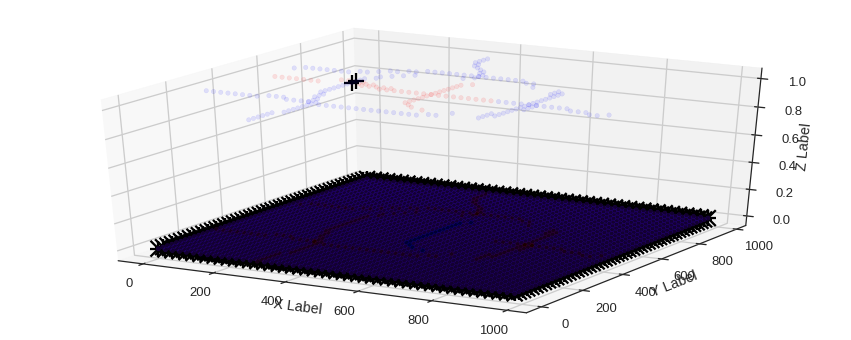

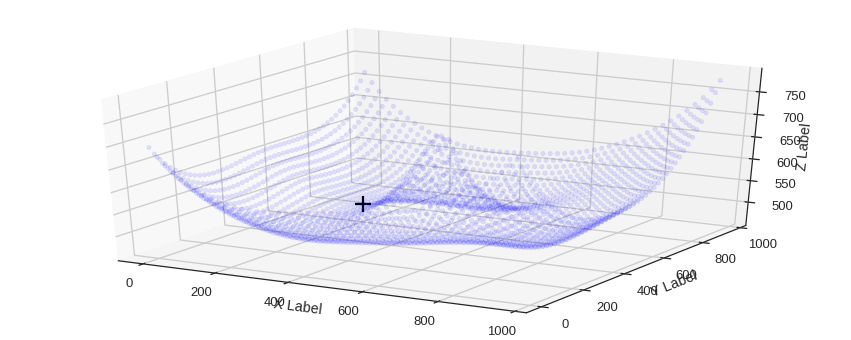

[] [ 240.          540.          502.09712982]


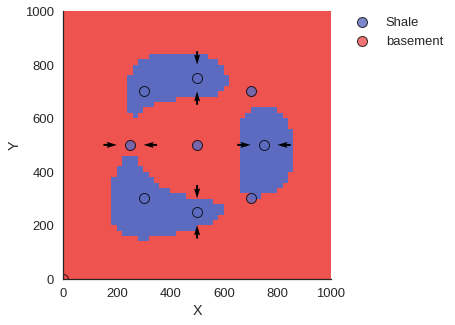

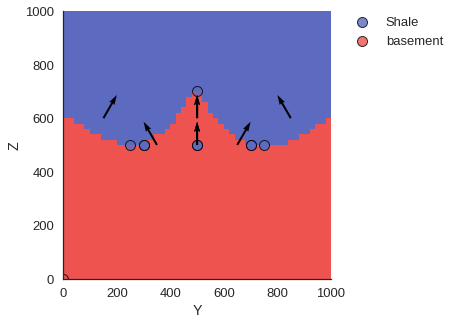

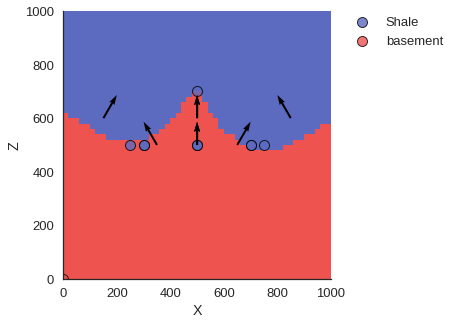

In [57]:
@pymc.deterministic
def interp_unc(value=0, z_unc=z_unc, original_values=original_values):
    
    print('Variation by:', z_unc*rescale_f)
    
    ### Declare on the the points on the contour closure (circle) to be
    ### assigned the starting uncertainty
    ### (COULD ALSO MAKE THIS TO DEPEND ON ITER TO CONTROL)
    start = 3#np.random.randint(8)
    print('Start at point:', start+1)
    #start_bool = interp_data.geo_data_res.interfaces['group_id'] == start
    #start_point = interp_data.geo_data_res.interfaces[start]
    
    #point_range = len(original_values)
    
    # change z_values on circle contour based on uncertainty variation
    changed_values = rotate_dome(original_values, start, z_unc)     
    
    # insert new changed values into interp_data
    interp_data.geo_data_res.interfaces.loc[0:7,'Z'] = changed_values
   
    return interp_data

@pymc.deterministic
def structural_model(interp_data_M=interp_unc, shale_n=shale_n, print_figures=True):
    lith_sol, fault_sol = gp.compute_model(interp_data_M)
    lith_block = lith_sol[0]
    
    #fault_block = fault_sol[0]  
    shale_surf_v, shale_surf_s = gp.get_surfaces(\
        interp_data = interp_data_M, potential_lith=lith_sol[1], n_formation = shale_n)
    #max_vol, trap, SSF, trap_control = max_trap_vol(interp_data_M, lith_block, fault_block, seal_surf_v, seal_th)
    #print("Maximum trap volume: %s m³" % max_vol)
    a_spill, f_leak = spill_leak_P(interp_data_M, shale_surf_v, lith_block, print_figures)
    print(a_spill, f_leak)
    
    if print_figures:
        plt.figure(1)
        gp.plotting.plot_section(geo_data, lith_sol[0], 
                                 int(resolution/2), plot_data =1, direction='z')
        plt.figure(2)
        gp.plotting.plot_section(geo_data, lith_sol[0], 
                                 int(resolution/2), plot_data =1, direction='x')
        plt.figure(3)
        gp.plotting.plot_section(geo_data, lith_sol[0], 
                                 int(resolution/2), plot_data =1, direction='y')
        #gp.plotting.plot_section(geo_data, trap, int(resolution/2), plot_data =0)
    return lith_sol#, fault_sol, max_vol, trap, SSF, trap_control


In [58]:
iterations = 5
model = pymc.Model([interp_unc, z_unc, structural_model])

Variation by: 35.4572365955
Start at point: 4


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:116: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


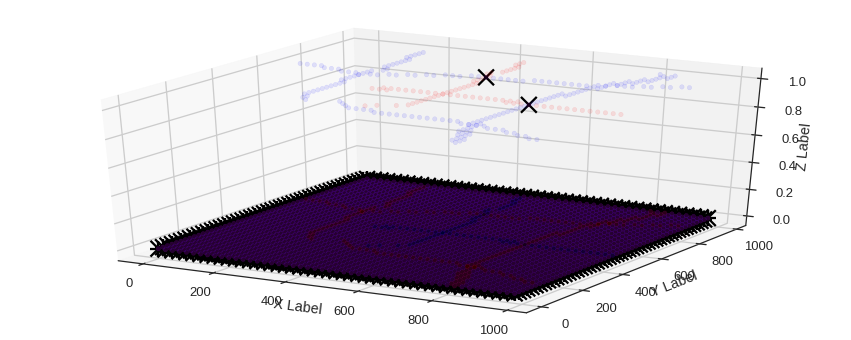

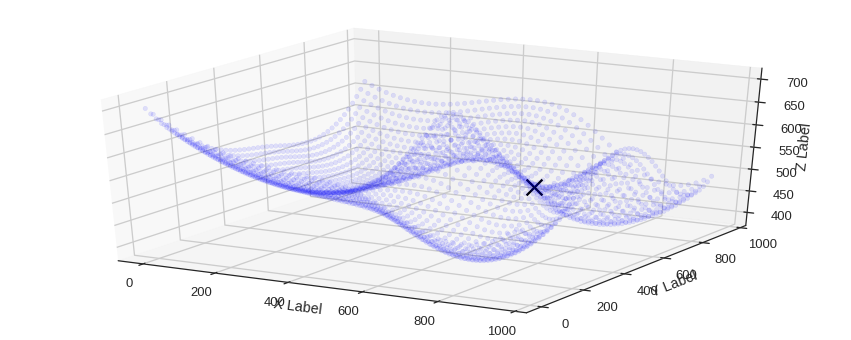

[ 740.          480.          522.16701508] []
 [---------------  40%                  ] 2 of 5 complete in 14.6 secVariation by: 37.4820737861
Start at point: 4


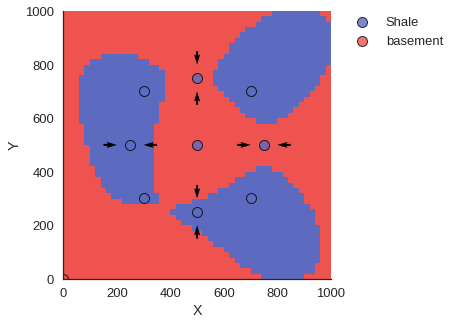

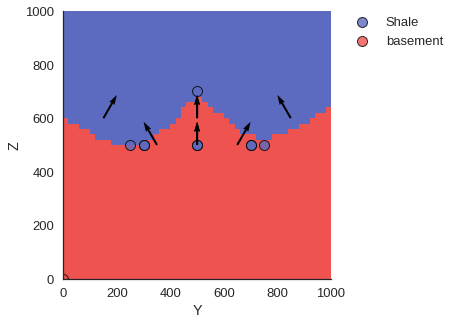

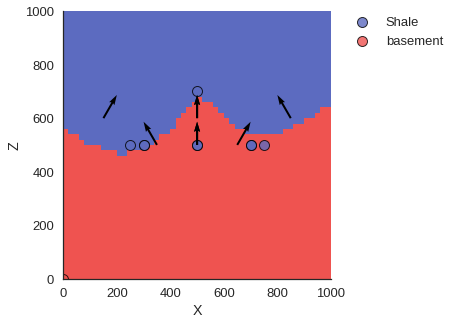

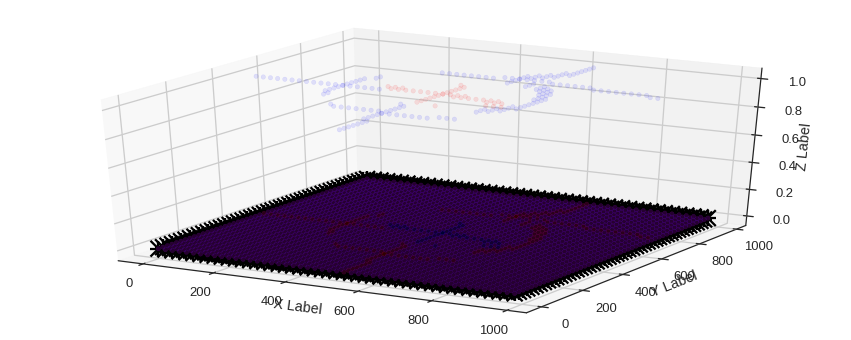

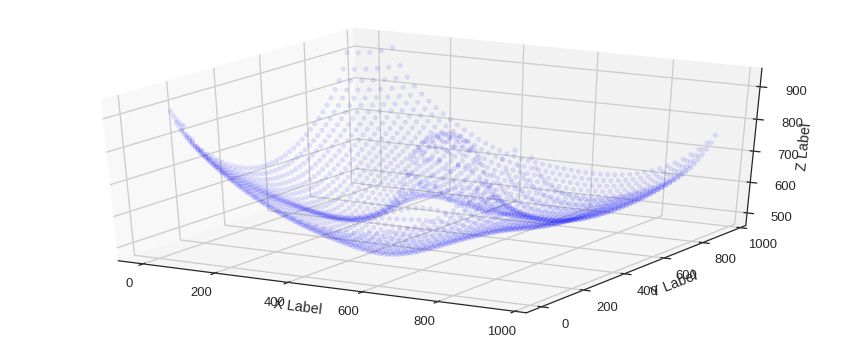

[] []
 [-----------------60%--                ] 3 of 5 complete in 29.3 secVariation by: 8.78243243228
Start at point: 4


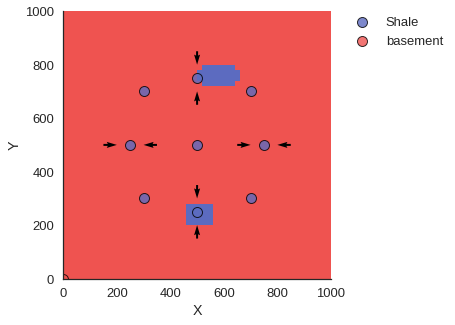

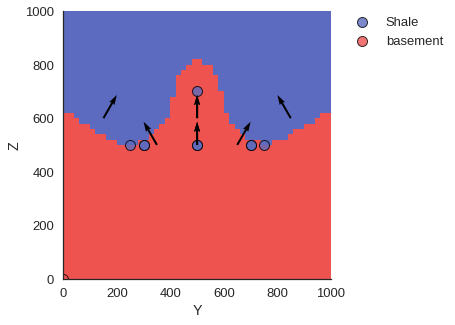

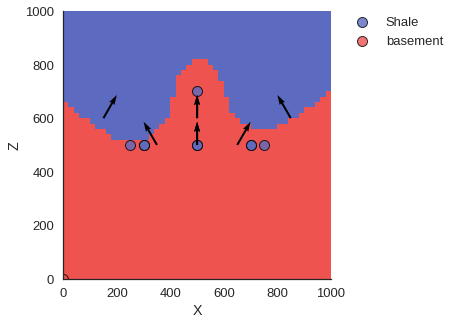

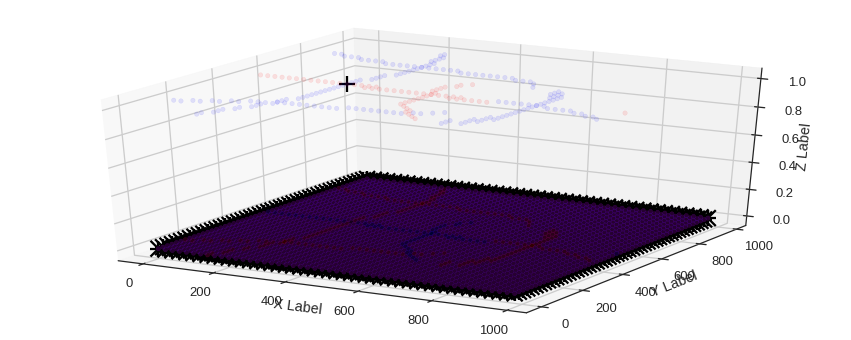

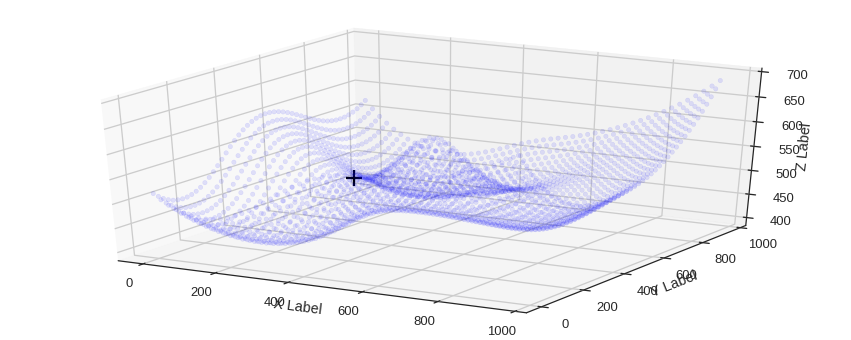

[] [ 240.          500.          495.62843323]
 [-----------------80%----------        ] 4 of 5 complete in 44.5 secVariation by: 44.5327304684
Start at point: 4


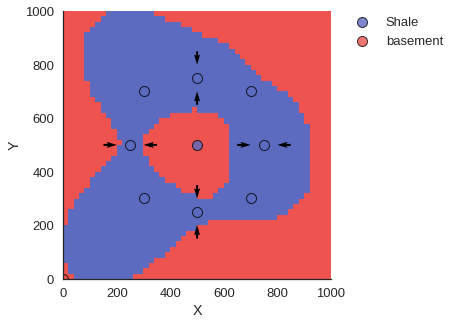

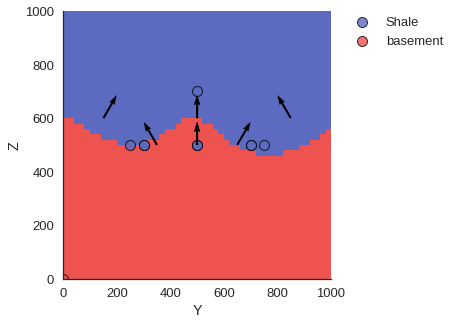

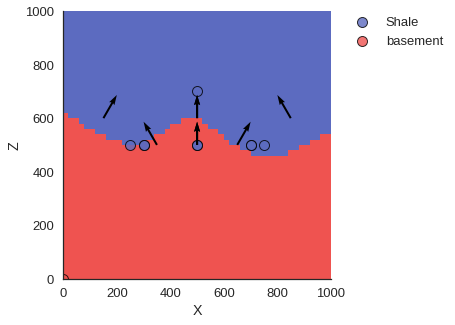

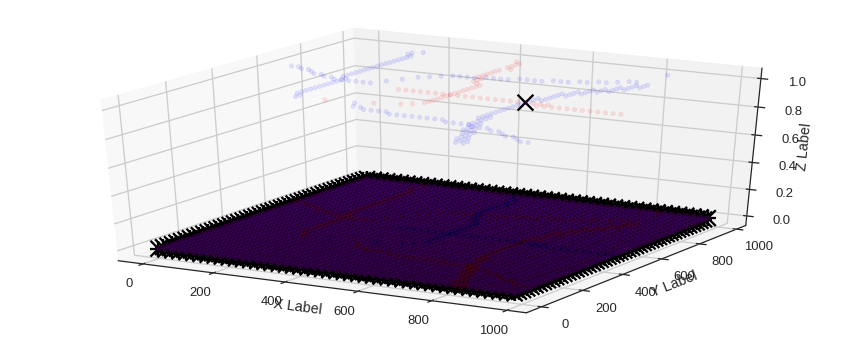

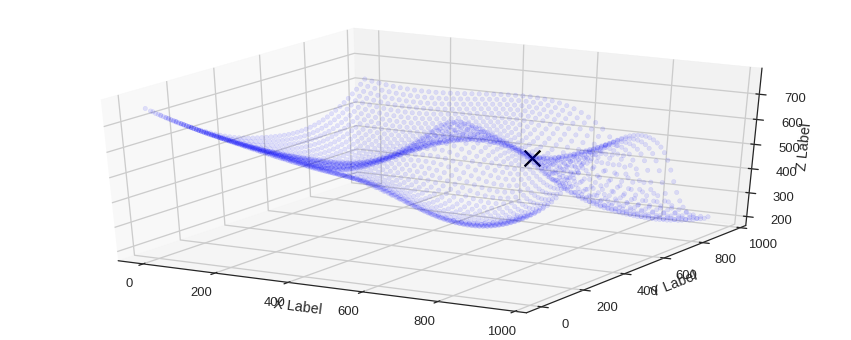

[ 720.          500.          546.47689819] []
 [-----------------100%-----------------] 5 of 5 complete in 59.4 secVariation by: 38.5073096214
Start at point: 4


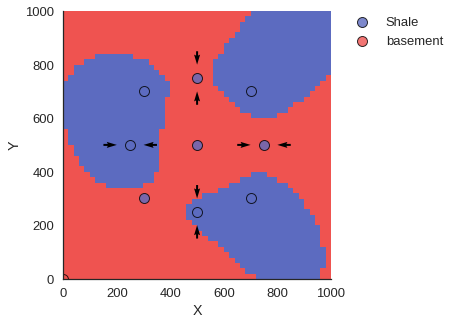

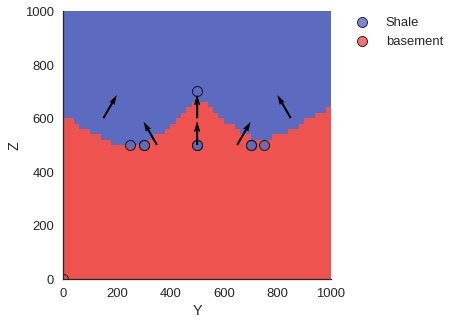

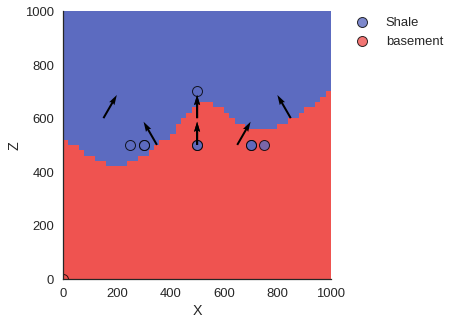

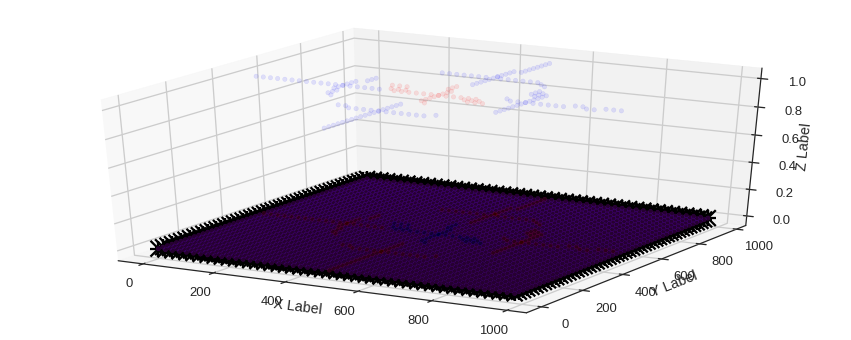

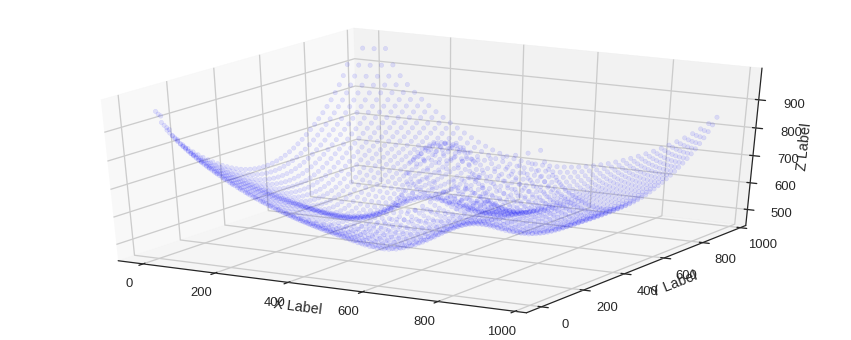

[] []
 [--------------------120%---------------------] 6 of 5 complete in 74.1 sec

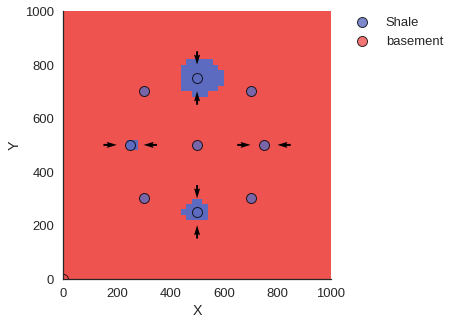

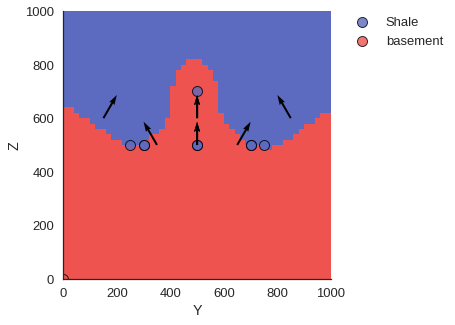

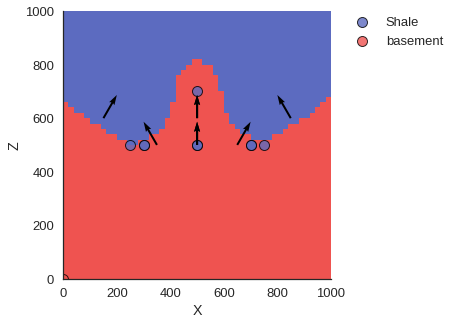

In [59]:
M = pymc.MCMC(model)
#M = pymc.MCMC(model,db= "hdf5" , dbname= "D:/PyMC_DataBase/prior_model_noBlocks_SSFc_3_1000iter_2017_11_12")
M.sample(iter=iterations)

In [60]:
#for i in range(8):
#    itp_d = interp_unc(z_unc=30, original_values=original_values,start=i)
#    structural_model(interp_data_M=itp_d, shale_n=shale_n, print_figures=True)